In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
base_info = pd.read_csv('./data/train/base_info.csv')
entprise_info = pd.read_csv('./data/train/entprise_info.csv')

In [51]:
import os

path = './feature_engineering/features/'
files = os.listdir(path)
files


['other_info_feature.csv',
 'tax_info_feature.csv',
 'annual_report_info_feature.csv',
 'change_info_feature.csv',
 'news_info_feature.csv',
 'base_info_feature.csv']

In [52]:
features = pd.read_csv(f'{path}/base_info_feature.csv')
for file in tqdm(files):
    if file != 'base_info_feature.csv':
        another_feature = pd.read_csv(f'{path}/{file}')
        features = pd.merge(features, another_feature, on='id',how = 'left')

100%|██████████| 6/6 [00:00<00:00, 19.64it/s]


In [53]:

data = pd.merge(features,entprise_info,how='left',on='id')
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24865 entries, 0 to 24864
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       24865 non-null  object 
 1   oplocdistrict            24865 non-null  int64  
 2   industryphy              24865 non-null  int64  
 3   industryco               24865 non-null  int64  
 4   enttype                  24865 non-null  int64  
 5   enttypeitem              24865 non-null  int64  
 6   state                    24865 non-null  int64  
 7   orgid                    24865 non-null  int64  
 8   jobid                    24865 non-null  int64  
 9   adbusign                 24865 non-null  int64  
 10  townsign                 24865 non-null  int64  
 11  regtype                  24865 non-null  int64  
 12  empnum                   24865 non-null  float64
 13  compform                 24865 non-null  int64  
 14  opform                

In [54]:

train = data[data['label'] >= 0 ]
test =  data[data['label'].isnull() ]

In [55]:
# 14:1 标签
positive, nagivate = train[train['label'] == 0],train[train['label'] == 1]
print(positive.shape[0]/nagivate.shape[0])

14.15290519877676


In [56]:
nan_num = train.isnull().sum(axis=1)
col = 'addtion_nan_num'
train[col] = nan_num
print(train.columns)
train.sort_values(by = [col],ascending=True,ignore_index = True,inplace= True)

nan_num = test.isnull().sum(axis=1)
test[col] = nan_num
print(test.columns)
test.sort_values(by = [col],ascending=True,ignore_index = True,inplace= True)

Index(['id', 'oplocdistrict', 'industryphy', 'industryco', 'enttype',
       'enttypeitem', 'state', 'orgid', 'jobid', 'adbusign', 'townsign',
       'regtype', 'empnum', 'compform', 'opform', 'venind', 'oploc', 'regcap',
       'enttypegb', 'nan_num', 'opfrom_year', 'opto_year',
       'industryphy_industryco', 'enttypegb_enttypeitem',
       'industryphy_enttypegb', 'industryphy_enttypeitem',
       'industryco_enttypeitem', 'industryco_enttypegb', 'nan_num_bin',
       'regcap_bin', 'empnum_bin', 'legal_judgment_num', 'has_legal_judgment',
       'TAX_NUM', 'HAS_TAX', 'TAX_AMOUNT_MEAN', 'ANCHEYEAR', 'REPORT_NUM',
       'HAS_REPORT', 'STATE', 'EMPNUMSIGN', 'BUSSTNAME', 'FORINVESTSIGN',
       'WEBSITSIGN', 'PUBSTATE', 'COLEMPLNUM', 'COLEMPLNUM_MEAN',
       'COLEMPLNUM_ADD', 'COLGRANUM', 'COLGRANUM_MEAN', 'COLGRANUM_ADD',
       'EMPNUM', 'EMPNUM_MEAN', 'EMPNUM_ADD', 'CHANGE_NUM', 'HAS_CHANGE',
       'positive_negtive_mode', 'positive_negtive_last',
       'positive_negtive_num', '

In [57]:
def count(data):
    nums = []
    num = 0
    for id in data.index:
        if data.loc[id]['label'] == 1:
            num += 1
        nums.append(num)
    return nums

    

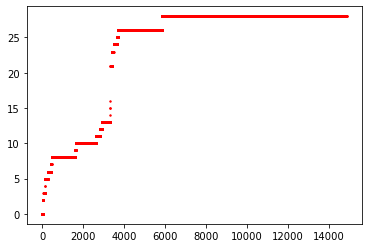

In [58]:
import numpy as np
plt.scatter(train.index,train[col],c = 'r',s=2)
plt.show()

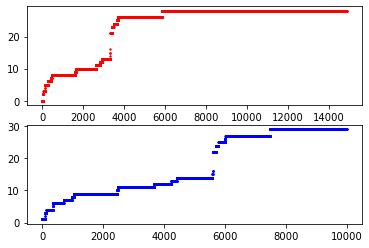

In [59]:
plt.subplot(211)  
plt.scatter(train.index,train[col],c = 'r',s=2)
plt.subplot(212)  
plt.scatter(test.index,test[col],c = 'b',s=2)
# plt.subplot(223)
# plt.plot(train.index,train.nan_num,c = 'r')
# plt.subplot(224)
# plt.plot(test.index,test.nan_num, c = 'b')

plt.show()

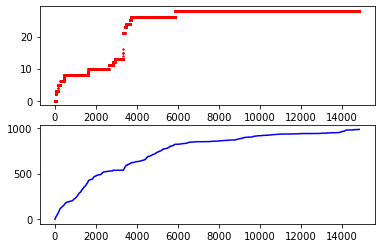

<Figure size 432x288 with 0 Axes>

In [60]:

plt.subplot(211) 
plt.scatter(train.index,train[col],c = 'r',s = 2)
plt.subplot(212) 
plt.plot(train.index,count(train), c = 'b')
plt.show()
plt.savefig('img.png')

In [70]:
train[col].value_counts().sort_index()

0       42
2       23
3       83
4        2
5      121
6      158
7       29
8     1160
9       19
10     983
11     213
12      83
13     416
14       1
15       2
16       1
21      67
23      82
24     182
25      40
26    2153
28    9005
Name: addtion_nan_num, dtype: int64

In [71]:
test[col].value_counts().sort_index()

1       98
2        2
3       41
4      206
5        7
6      349
7      268
8       73
9     1423
10      16
11    1196
12     567
13     171
14    1177
15       4
16       3
22     110
24      81
25     211
26      19
27    1456
29    2522
Name: addtion_nan_num, dtype: int64